In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import matplotlib.pyplot as plt

# Trajectories Plot

This part reads the file obtained from: Locateframes.py and plots Kilobot trajectories.
Before doing that, it modifies the data appropietly to the case using the following functions:


        * tp.link(f,searchrange,...,memory,..)    :: Links the data frame elements to form trajectories. Key parameters: 
                  - f= datafile 
                  - searchrange= distance that particles can move between frames
                  - memory = the maximum number of frames during which a feature can vanish, then reappear nearby, and be considered the same particle. 0 by default.

               Increasing the memory allows you to aviod new (false) trajectories, but at the same time it my get confused for nearby kilobots (for big number of N, big memory may lead to false trajectories)

        * tp.filter_stubs(tracks, threshold=100) :: Filter out trajectories with few points. They are often spurious.

                      - tracks = trajectories (the output of tp.link)
                      - threshold = minimum number of points (video frames) to survive

                      Good method to make sure that you end with the number of trajectories that you want.
        
        * tp.plot_traj(file)   ::  Plots the trajectory file

In [2]:
t1 = pd.read_csv(r'C:/Users/quimb/OneDrive/Desktop/INVESTIGO/LABRObotica/Resultats/FItxers csv/N=10 lamb=0.9/Video1/located_frames_Video1.csv')


t1 = t1.drop(t1.index[-1])

t1=tp.link(t1,200, memory=400)

#t1=tp.link(t1,200, memory=100) ---> Original, memory=100 
 

# Create a new column named 'particle' with the values from the first column
#print(t1.iloc[:])

Frame 33507: 9 trajectories present.


In [3]:
t13 = tp.filter_stubs(t1, 300)
#100= minimum number of points (video frames) to survive
# Compare the number of particles in the unfiltered and filtered data.
# print('Before:', t0['particle'].nunique())
# print('After:', t10['particle'].nunique())
#print('Before:', t1['particle'].nunique())
#print('After:', t11['particle'].nunique())
# print('Before:', t2['particle'].nunique())
print('After:', t13['particle'].nunique())
print('Before:', t1['particle'].nunique())
#print(t13)

After: 10
Before: 11


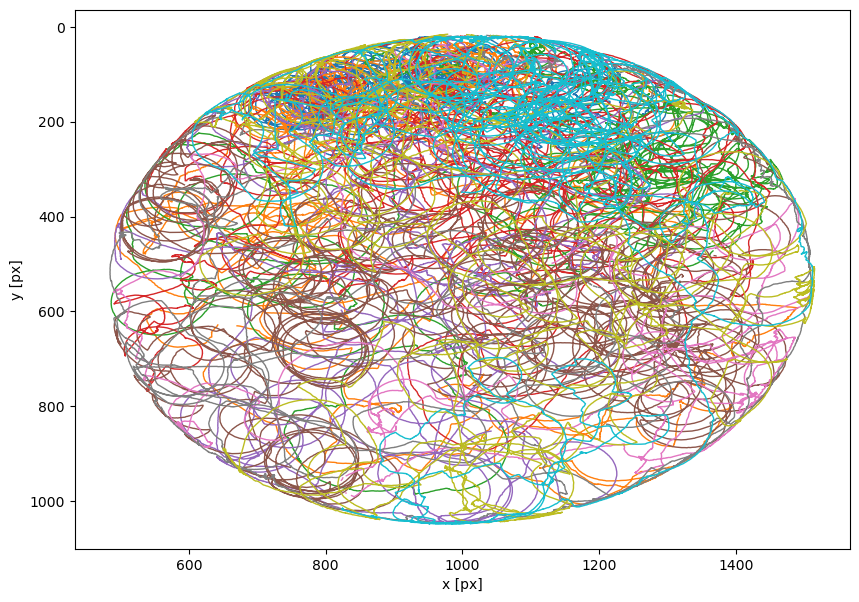

In [4]:
plt.figure(figsize=(10, 7))
tp.plot_traj(t13)

plt.savefig(r'C:/Users/quimb/OneDrive/Desktop/INVESTIGO/LABRObotica/Resultats/N=10lamb09/Video1/trajectory_complete.png');
plt.close()  # Close the plot

# MSD Values all and mean

Reads the trajectories file and computes the mean square displacement for the single trajectory and for the mean trajectory. It ends up calculating the fit of the behaviour.

It uses  the following functions:

     * tp.imsd(dataframe, microns/pixel, frames/second) : It returns the mean squared displacement of all the different trajectories in the data frame.

In [5]:
im = tp.imsd(t13, 4000000/1023., 25) # microns per pixel = 100/285., frames per second = 25
im.to_csv('Dataframe_MSD.csv', index=False)

In [9]:
# #Canvi en fitxers (IF needed)

im[5]=im[10]

indices_to_remove = sorted([10], reverse=True)

# Remove elements at specified indices
for index in indices_to_remove:
    del im[index]

print(im)

                         0             1             2             3  \
lag time [s]                                                           
0.04          1.885561e+07  2.608443e+07  2.224239e+07  3.974145e+07   
0.08          6.040867e+07  8.340167e+07  7.384538e+07  1.331525e+08   
0.12          1.265723e+08  1.743976e+08  1.553003e+08  2.811605e+08   
0.16          2.184242e+08  2.987048e+08  2.673156e+08  4.853800e+08   
0.20          3.351865e+08  4.568881e+08  4.101445e+08  7.461957e+08   
...                    ...           ...           ...           ...   
3.84          5.356973e+10  8.861251e+10  8.565961e+10  1.488553e+11   
3.88          5.402480e+10  8.989716e+10  8.689608e+10  1.508945e+11   
3.92          5.446935e+10  9.118363e+10  8.811813e+10  1.529393e+11   
3.96          5.490483e+10  9.247166e+10  8.935135e+10  1.549781e+11   
4.00          5.533013e+10  9.376378e+10  9.058163e+10  1.570071e+11   

                         4             6             7         

In [10]:

#Mean of the MSD of the trajectories 

x=im[1]+im[2]+im[3]+im[4]+im[5]+im[7]+im[8]+im[9]+im[0] +im[6]
mean=x/9
print(mean)

lag time [s]
0.04    3.092205e+07
0.08    1.037827e+08
0.12    2.200879e+08
0.16    3.805723e+08
0.20    5.854133e+08
            ...     
3.84    1.069696e+11
3.88    1.082810e+11
3.92    1.095876e+11
3.96    1.108920e+11
4.00    1.121880e+11
Length: 100, dtype: float64


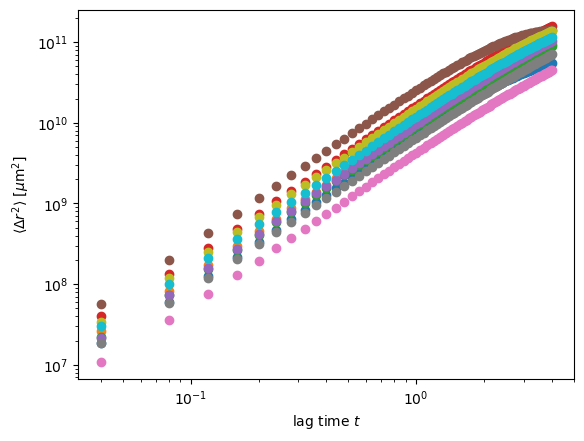

In [11]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'o')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#ax.seplt.savefig('Meansquared_totes.png')
plt.savefig(r'C:/Users/quimb/OneDrive/Desktop/INVESTIGO/LABRObotica/Resultats/N=10lamb09/Video1/Meansquared_totes.png');

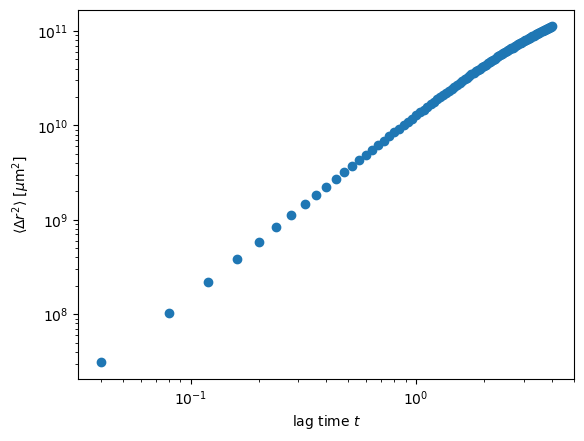

In [12]:
fig, ax = plt.subplots()
ax.plot(mean.index, mean, 'o')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
plt.savefig(r'C:/Users/quimb/OneDrive/Desktop/INVESTIGO/LABRObotica/Resultats/N=10lamb09/Video1/Mean_Meansquared.png');

### Calcul exponent

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

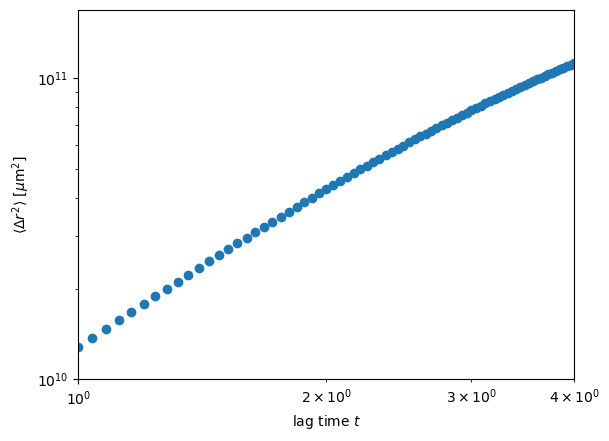

In [13]:
fig, ax = plt.subplots()
ax.plot(mean.index, mean, 'o')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,4)
ax.set_ylim(10e9)
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')

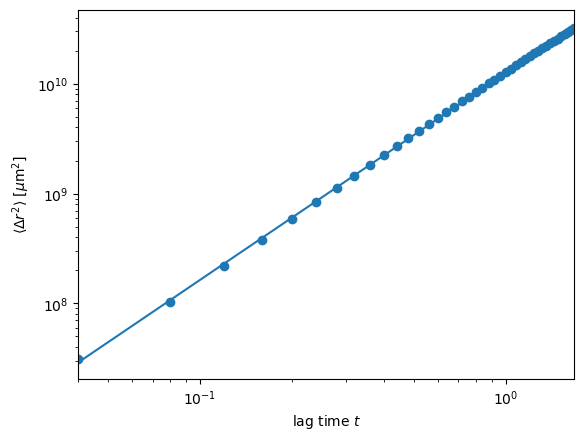

,n,A
0,1.884687,1.254268e+10


In [14]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(mean[mean.index<1.7]) 
# performs linear best fit in log space, plots]

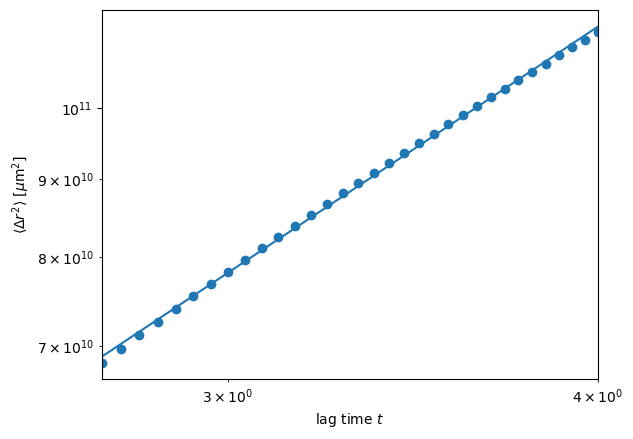

,n,A
0,1.28429,1.906177e+10


In [15]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(mean[mean.index>2.7]) 

PL=At^n

# MSD results with exponent


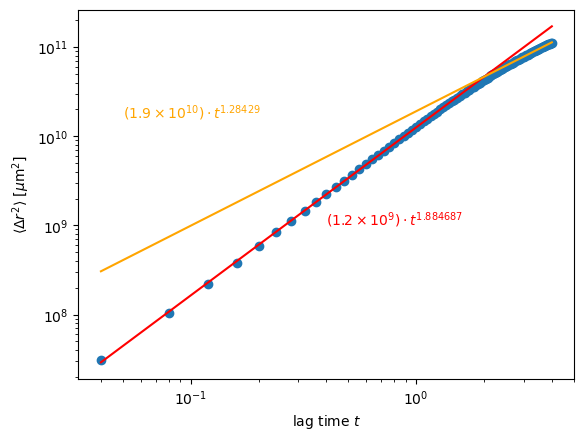

In [17]:
fig, ax = plt.subplots()
ax.plot(mean.index, mean, 'o')
ax.plot(mean.index, 1.254268e+10*mean.index**1.884687,'r')
ax.plot(mean.index, 1.906177e+10*mean.index**1.28429,'orange')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.text(4e-1, 1e9, r'($1.2\times 10^{9}) \cdot t^{1.884687}$', color='red')

# Add text near the orange function
ax.text(0.5e-1, 1.6e10, r'$( 1.9\times 10^{10}) \cdot t^{1.28429}$', color='orange')
plt.savefig(r'C:/Users/quimb/OneDrive/Desktop/INVESTIGO/LABRObotica/Resultats/N=10lamb09/Video1/Meansquared_powerlaw.png');